## Scikit Learn
Scikit Learn is a free python machine learning library which features various algorithms like support vector machine (SVM), random forests, k-neighbours. It supports Python numerical libraries like NumPy and SciPy. 

In [3]:
import sklearn

print(sklearn.__version__)

0.23.2


## Loading an example dataset

In [4]:
from sklearn import datasets

# Data to quantify the morphologic variation of Iris flowers
# of three related species
iris = datasets.load_iris()
digits = datasets.load_digits()

In [7]:
print(f"Access to the features that can be used to classify the digits samples:\n{digits.data}")

Access to the features that can be used to classify the digits samples:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [8]:
print(f"Ground truth for the digits dataset:\n{digits.target}")

Ground truth for the digits dataset:
[0 1 2 ... 8 9 8]


In [11]:
print(f"Shape of the data arrays:\n{digits.images[0]}")

Shape of the data arrays:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


## Learning and Predicting
In Scikit Learn, an estimator for classification is a Python object that implements the methods ```fit(X, y)``` and ```predict(T)```.

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        69
           3       0.99      0.97      0.98        71
           4       1.00      1.00      1.00        72
           5       0.97      0.99      0.98        69
           6       0.99      1.00      0.99        85
           7       1.00      0.99      0.99        74
           8       0.99      1.00      0.99        74
           9       0.99      0.97      0.98        74

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719


Confusion matrix:
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0  0  0]
 [ 0  0 69  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 72  0  0  0  0

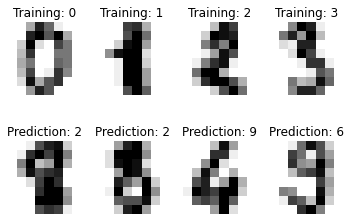

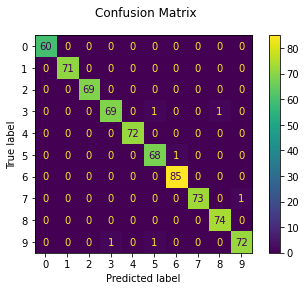

In [29]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

clf = svm.SVC(gamma=0.001, C=100) # classifier

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" %label)
    
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(data, digits.target, test_size=0.4, shuffle=True)

# Training
clf.fit(X_train, Y_train)

# Prediction
predicted = clf.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
    
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_test, predicted)))
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

## Model Persistence
Save a model in sklearn by using pickle

In [31]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
X, Y = datasets.load_iris(return_X_y=True)
clf.fit(X,Y)

SVC()

In [53]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [33]:
Y[0]

0

## Statistical-learning for Scientific Data Processing

In [55]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
data.shape 
# 150 observations of irises, each described by 4 feautures
# m = 150, n = 4

(150, 4)

## Supervised Learning
* classification 
* regression

In [58]:
import numpy as np
from sklearn import datasets
iris_X, iris_Y = datasets.load_iris(return_X_y=True)
np.unique(iris_Y)

array([0, 1, 2])

In [59]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_Y_train = iris_Y[indices[:-10]]
iris_Y_test = iris_Y[indices[-10:]]
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_Y_train)

KNeighborsClassifier()

In [60]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [61]:
iris_Y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Linear Regression

In [63]:
from sklearn import linear_model

diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_Y_train = diabetes_Y[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_Y_test = diabetes_Y[-20:]
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_Y_train)

LinearRegression()

In [64]:
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [65]:
# mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_Y_test)**2)

2004.5676026898207

In [67]:
# Explained variance score: 1 is prefect pred.
# 0 means that there is no linear relation between X and Y
regr.score(diabetes_X_test, diabetes_Y_test)

0.5850753022690575

## Support Vector Machines (SVMs)

**Warning: Normalizing data**<br>
For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good prediction.

In [70]:
from sklearn import svm

svc = svm.SVC(kernel="linear") # linear, poly, rbf
svc.fit(iris_X_train, iris_Y_train)

SVC(kernel='linear')